In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scraper_xm import exportacoes
from scraper_xm import importacoes

***Exportações***

In [ ]:
df_exportacoes = exportacoes()
df_exportacoes.info()

In [8]:
df_exportacoes["DATA"] = df_exportacoes["CO_ANO"].astype(str) + "-" + df_exportacoes["CO_MES"].astype(str) + "-01"
df_exportacoes["DATA"] = pd.to_datetime(df_exportacoes["DATA"], format = "%Y-%m-%d")

In [9]:
df_x_data = df_exportacoes.groupby("DATA")["VL_FOB"].sum()

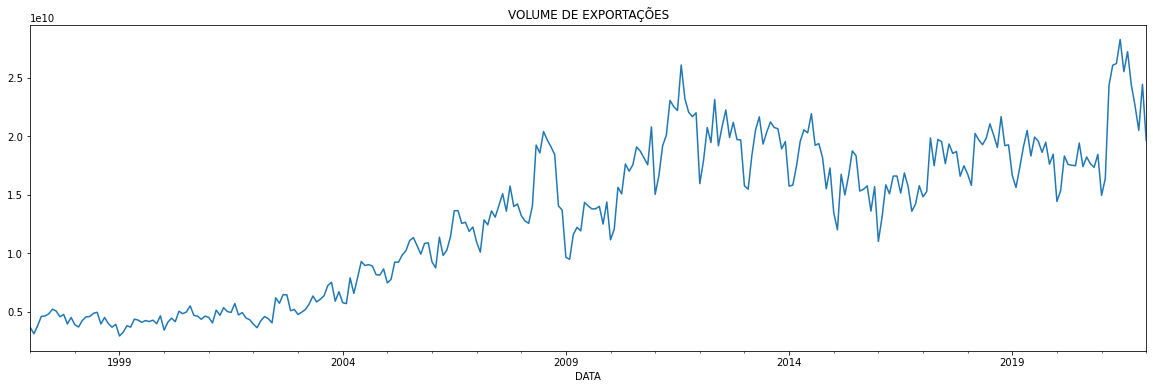

In [19]:
plt.figure(figsize = (20, 6))

df_x_data.plot()
plt.title("VOLUME DE EXPORTAÇÕES")

plt.show()

***Importações***

In [ ]:
df_importacoes = importacoes()
df_importacoes.info()

In [11]:
df_importacoes["DATA"] = df_importacoes["CO_ANO"].astype(str) + "-" + df_importacoes["CO_MES"].astype(str) + "-01"
df_importacoes["DATA"] = pd.to_datetime(df_importacoes["DATA"], format = "%Y-%m-%d")

In [33]:
df_m_data = df_importacoes.groupby("DATA")["VL_FOB"].sum()

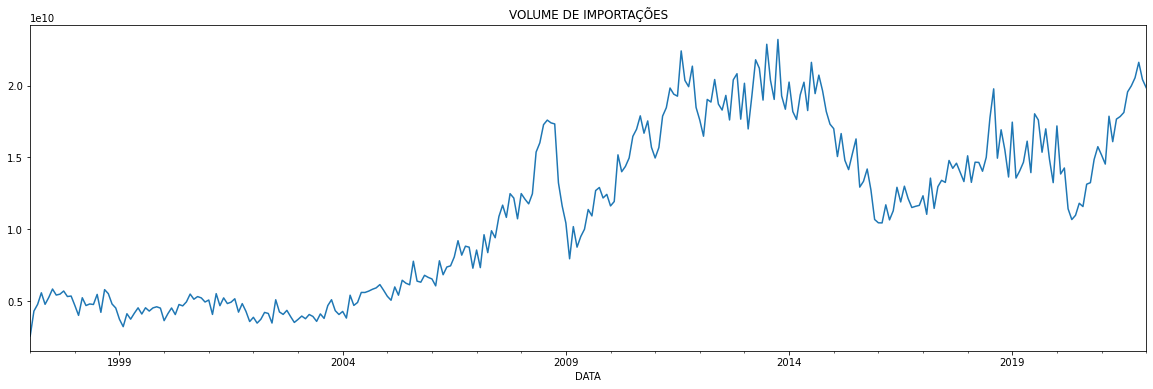

In [20]:
plt.figure(figsize = (20, 6))

df_m_data.plot()
plt.title("VOLUME DE IMPORTAÇÕES")

plt.show()

***Saldo***

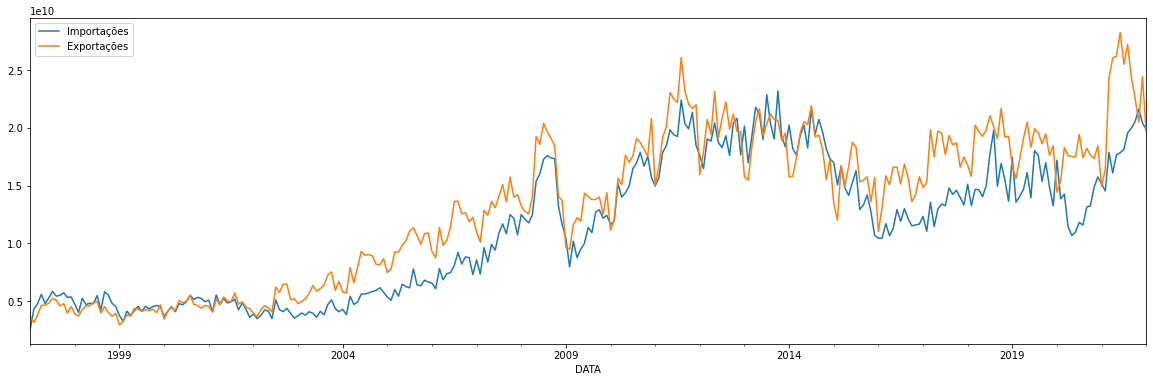

In [37]:
plt.figure(figsize = (20, 6))

df_m_data.plot()
df_x_data.plot()
plt.legend(["Importações", "Exportações"])

plt.show()

In [44]:
saldo_balanca = df_x_data - df_m_data

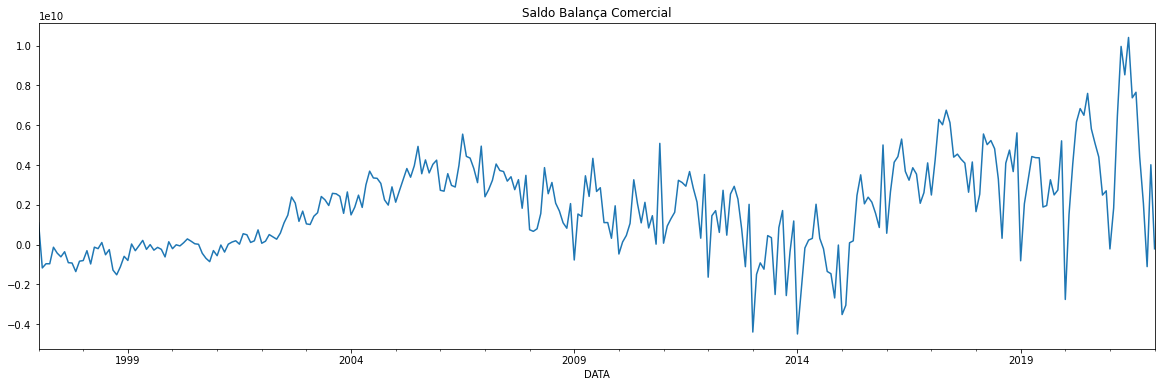

In [45]:
plt.figure(figsize = (20, 6))

saldo_balanca.plot()
plt.title("Saldo Balança Comercial")

plt.show()

***PRINCIPAIS DESTINOS DAS EXPORTAÇÕES***

In [50]:
top10_all = df_exportacoes.groupby("NO_PAIS")["VL_FOB"].sum().sort_values(ascending=False).head(10)

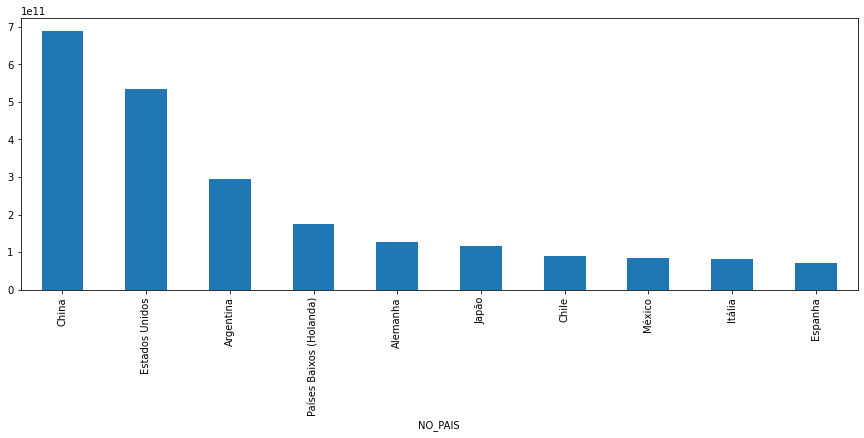

In [57]:
plt.figure(figsize = (15, 5))

top10_all.plot(kind = "bar")

plt.show()

In [63]:
df_top_paises = df_exportacoes[df_exportacoes["NO_PAIS"].isin(top10_all.index)]
df_top_paises2 = df_top_paises.groupby(["DATA", "NO_PAIS"])["VL_FOB"].sum().reset_index()

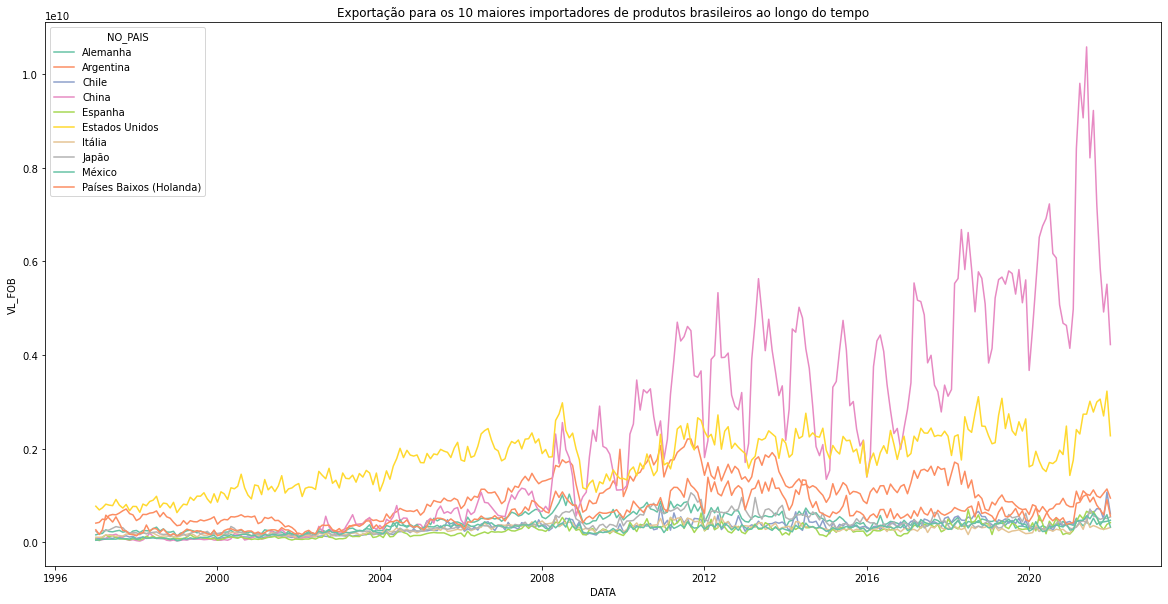

In [73]:
plt.figure(figsize=(20,10))

sns.lineplot(data = df_top_paises2, x = "DATA", y = "VL_FOB", hue = "NO_PAIS", palette='Set2')
plt.title("Exportação para os 10 maiores importadores de produtos brasileiros ao longo do tempo")

plt.show()